<a href="https://colab.research.google.com/github/2303A52060/sml_assignments/blob/main/SML_A_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-10.

Question 1:
https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awarenessLinks

Read the data with pandas and find features and target variables

Find target variable

Train KNN model

Find accuracy with different test sizes

In [2]:
import pandas as pd

# Load the dataset
file_path = 'breast_cancer_survival.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
print("First 5 rows of the dataset:")
print(data.head())

# Display a summary of the data (column names, data types, and non-null values)
print("\nSummary of the dataset:")
print(data.info())

# Checking for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Target Variable:
# Assuming 'Patient_Status' is the target variable indicating Alive (1) or Dead (0).
print("\nTarget variable: 'Patient_Status'")

# Features: All other columns are features
features = data.drop(['Patient_Status'], axis=1)
print("\nFeature variables:")
print(features.columns)


First 5 rows of the dataset:
   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0  

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'breast_cancer_survival.csv'
data = pd.read_csv(file_path)

# Preprocessing

# Encoding the target variable (Alive = 1, Dead = 0)
data['Patient_Status'] = data['Patient_Status'].map({'Alive': 1, 'Dead': 0})

# Dropping columns that are not useful for model training (like dates)
data_cleaned = data.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)

# Encoding categorical variables using one-hot encoding (convert categorical to numerical)
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Dropping rows with missing values
data_final_cleaned = data_encoded.dropna()

# Splitting data into features (X) and target (y)
X = data_final_cleaned.drop('Patient_Status', axis=1)
y = data_final_cleaned['Patient_Status']

# Function to train the model and evaluate accuracy for different test sizes
def evaluate_model(test_size):
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  # Train a Random Forest classifier
  clf = RandomForestClassifier(random_state=42)
  clf.fit(X_train, y_train)
  # Make predictions on the test set
  y_pred = clf.predict(X_test)
  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

# Test the model with different test sizes
test_sizes = [0.2, 0.3, 0.4]
accuracies = {test_size: evaluate_model(test_size) for test_size in test_sizes}

# Output the accuracies for different test sizes
for test_size, accuracy in accuracies.items():
  print(f"Test size: {test_size}, Accuracy: {accuracy}")

Test size: 0.2, Accuracy: 0.7692307692307693
Test size: 0.3, Accuracy: 0.7525773195876289
Test size: 0.4, Accuracy: 0.7364341085271318


Question 2:

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awarenessLinks

Implement SVM using pre-defied library. Analysis of different training and testing splits ranges, and find the accuracy. By taking test-size as [20, 25, 30, 35] compute the result.

Test Size: 20.0%, Accuracy: 0.0896
Test Size: 25.0%, Accuracy: 0.0476
Test Size: 30.0%, Accuracy: 0.0297
Test Size: 35.0%, Accuracy: 0.0342


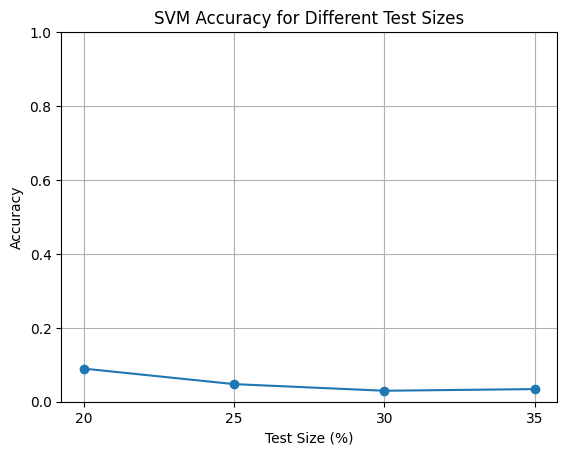

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical features


# Load the dataset
data = pd.read_csv('breast_cancer_survival.csv')  # Update with actual path
# data = pd.read_csv(file_path) # This line seems redundant as you already loaded the data above.

# Prepare features and labels
X = data.drop('Age', axis=1)  # Update with actual label column
y = data['Age']  # Update with actual label column

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and encode categorical features
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is of object type (categorical)
        X[column] = label_encoder.fit_transform(X[column]) # Encode the categorical feature

# Analyze different test sizes
test_sizes = [0.2, 0.25, 0.3, 0.35]  # 20%, 25%, 30%, 35%
results = {}

for test_size in test_sizes:
    X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = SVC(kernel='linear')  # Linear kernel

    # Fit the model using X_train and Y_train (not y_test)
    model.fit(X_train, Y_train) # Corrected this line to use Y_train for training

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[test_size] = accuracy
    print(f'Test Size: {test_size * 100}%, Accuracy: {accuracy:.4f}')

# Visualize the results
test_sizes_percentage = [size * 100 for size in test_sizes]
accuracies = [results[size] for size in test_sizes]

plt.plot(test_sizes_percentage, accuracies, marker='o')
plt.title('SVM Accuracy for Different Test Sizes')
plt.xlabel('Test Size (%)')
plt.ylabel('Accuracy')
plt.xticks(test_sizes_percentage)
plt.ylim(0, 1)
plt.grid()
plt.show()